Original image:


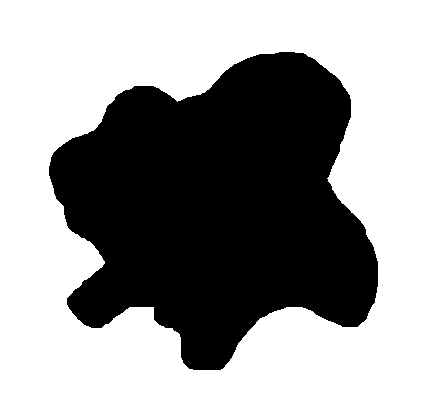

Masked image: 


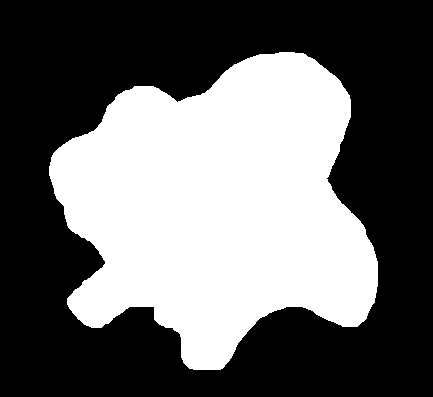

Moments: {'m00': 69264.0, 'm10': 15153645.0, 'm01': 14287401.5, 'm20': 3760207151.0, 'm11': 3113646449.833333, 'm02': 3328284609.833333, 'm30': 1014455432771.7001, 'm21': 771675209513.05, 'm12': 727464663243.15, 'm03': 843006541924.15, 'mu20': 444878022.0726352, 'mu11': -12165087.234515667, 'mu02': 381157074.2852526, 'mu30': -2868018404.91626, 'mu21': 1363092644.021988, 'mu12': 4318029130.570251, 'mu03': -779939317.4348145, 'nu20': 0.09273118599281786, 'nu11': -0.0025357129617397567, 'nu02': 0.07944907546422524, 'nu30': -0.002271501420956405, 'nu21': 0.001079584033520724, 'nu12': 0.003419925509894997, 'nu03': -0.0006177203273089448}
Smallest encapsulating circle:
 Center: (220.88671875, 212.41464233398438)
 Radius: 179 pixels


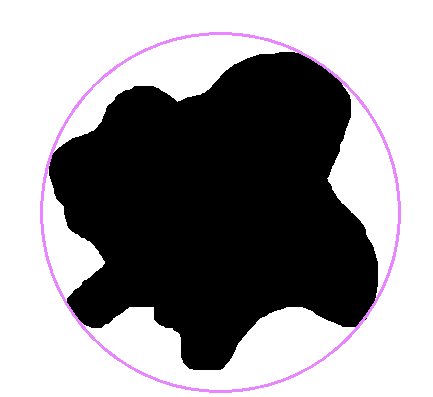

Contour of original image: 


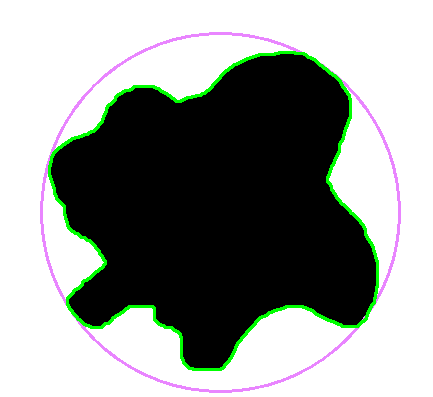

Area: 69264.0 pixels
Major Axis Length: 354.0536682481909 pixels


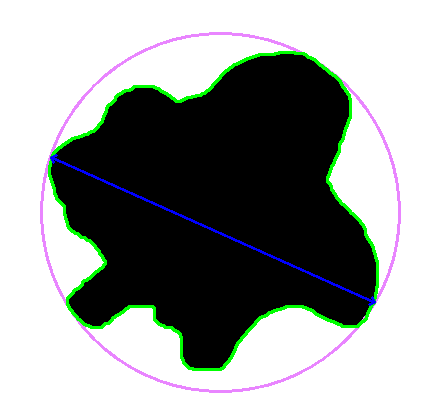

Perimeter: 1252.1950798034668 pixels
Centroid: (218, 206)


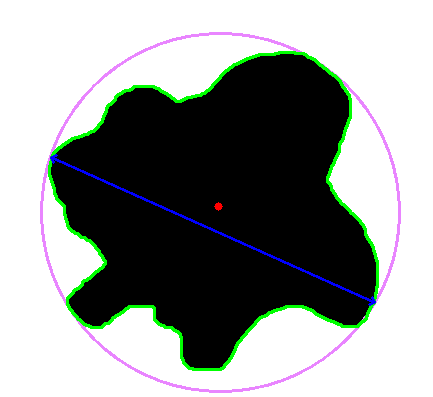

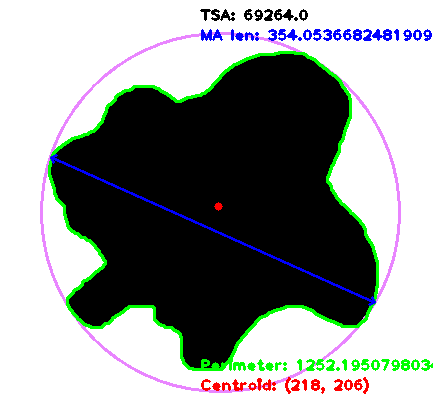

In [220]:
# Import Librabries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math

# Declarations for image formatting
color1 = (255, 133, 233)  # purple
color2 = (0, 255, 0)      # green
color3 = (255, 0, 0)      # blue
color4 = (0,0, 255)       # red
color5 = (0, 0, 0)        # black
color6 = (255, 255, 255)  # white
thickness = 2
contourIdx = -1
tipLength = 0.015
font = cv2.FONT_HERSHEY_PLAIN
font_scale = 1
font_thickness = 2

# Load the image
img = cv2.imread('img1.png')

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found.")
else:
    print('Original image:')
    cv2_imshow(img)

    # Get the masked image of the original image
    img_not = cv2.bitwise_not(img)
    print('Masked image: ')
    cv2_imshow(img_not)

    # Convert the masked image to binary
    (thresh, img_binary) = cv2.threshold(img_not, 175, 255, cv2.THRESH_BINARY)
    binary_array = np.array(img_binary, dtype = 'uint8')

    # Convert the masked image to grayscale then followed by blurring the image
    gray = cv2.cvtColor(img_not, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    ret, thresh = cv2.threshold(blurred, 127, 255, 0)

    # Find contours and moments of the blurred particle
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    count = contours[0]
    moments = cv2.moments(count)
    print('Moments:', moments)

    # Get the smallest encapsulating circle
    (ec_X,ec_Y),radius = cv2.minEnclosingCircle(count)
    center = (int(ec_X),int(ec_Y))
    radius = int(radius)
    print('Smallest encapsulating circle:')
    print(' Center:', (ec_X, ec_Y))
    print(' Radius:', radius, 'pixels')

    img2 = cv2.circle(img,center,radius, color1, thickness)
    cv2_imshow(img2)

    # Highlight the contour of the particle
    cv2.drawContours(img, contours, contourIdx, color2, thickness)
    print('Contour of original image: ')
    cv2_imshow(img)

    # Get the area of the particle
    area = cv2.contourArea(contours[0])
    print('Area:', area, 'pixels')


    # List out the points on the contour of the particle
    List = []
    for c in range(len(hierarchy[0])):
        for p in contours[c]:
            point_array = np.array(p[0], dtype = 'int')
            List.append(tuple(point_array))

    # Find all possible axes for the particle
    majors_list = []
    for p1 in range(0, len(List)):
        for p2 in range(p1+1, len(List)):

          line_image = np.zeros((img.shape), dtype = 'uint8')
          cv2.line(line_image, List[p1], List[p2], (1), thickness = 1, lineType = cv2.LINE_8)
          stencil = cv2.bitwise_and(line_image, binary_array)

          if (stencil == line_image).all():
            distance = math.sqrt(math.pow(List[p1][0] - List[p2][0], 2) + math.pow(List[p1][1] - List[p2][1], 2))
            majors_list.append([List[p1], List[p2], distance])

    # Select the longest axis as major axis
    major_axis = max(majors_list, key = lambda sublist: sublist[2])
    major_axis_image = cv2.arrowedLine(img, major_axis[0], major_axis[1], color3, thickness, tipLength = tipLength)
    major_axis_image = cv2.arrowedLine(img, major_axis[1], major_axis[0], color3, thickness, tipLength = tipLength)

    print('Major Axis Length:', major_axis[2], 'pixels')
    cv2_imshow(img)

    # Find the total perimeter of the particle
    perimeter = cv2.arcLength(count, True)
    print('Perimeter:', perimeter, 'pixels')

    # Find the centroid of the particle
    c_x = int(moments['m10']/moments['m00'])
    c_y = int(moments['m01']/moments['m00'])
    print('Centroid:', (c_x, c_y))
    img = cv2.line(img, (c_x,c_y), (c_x,c_y), color4, thickness = 8)
    cv2_imshow(img)

    # Adding text to img
    tsa = 'TSA: ' + str(area)
    cv2.putText(img, tsa, (200, 20), font, font_scale, color5, font_thickness)

    ma_len = 'MA len: ' + str(major_axis[2])
    cv2.putText(img, ma_len, (200, 40), font, font_scale, color3, font_thickness)

    perimeter = 'Perimeter: ' + str(perimeter)
    cv2.putText(img, perimeter, (200, 370), font, font_scale, color2, font_thickness)

    centroid = 'Centroid: ' + str((c_x, c_y))
    cv2.putText(img, centroid, (200, 390), font, font_scale, color4, font_thickness)

    # Display final output image
    cv2_imshow(img)

    # Save the final image
    cv2.imwrite('sol.png', img)